In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29. , 40. , 44. , 31. , 17. , 29. , 22. , 70.5, 45. ,  7. , 24. ,
       37. , 22. , 45. , 30. , 17. , 24. ,  1. , 28.5, 60. , 22. , 71. ,
       34. , 24. , 22. , 27. , 30.5, 27. , 15. , 29. , 35. , 42. , 35. ,
       25. ,  9. , 33. , 33. , 31. , 16. , 24. , 21. , 42. , 39. , 45. ,
       42. , 39. , 35. , 31. , 35. , 22. , 54. , 23. , 28. , 34. , 36.5,
       28. ,  5. , 50. , 34. , 28. , 30. , 30. , 32. ,  4. , 47. , 53. ,
       14. , 43. , 39. , 25. , 24. , 40. , 22. , 22. , 23. , 17. , 23. ,
       71. , 29. , 23. , 38. , 32. , 28. , 39. , 24. , 29. , 32. , 25. ,
       54. , 21. , 44. , 30. , 20. , 26. , 25. , 31. , 26. , 36. , 32. ,
       25. , 38. , 24. , 25. ,  3. , 24. , 29. , 28. , 33. , 24. , 18. ,
       33. , 31. , 33. , 38. , 28.5, 36. , 38. , 62. , 20. , 16. ,  4. ,
       36. , 34. , 19. , 40. ,  3. , 25. , 59. , 31. , 41. , 38. , 35. ,
       17. ,  1. , 40.5, 32. ,  4. ,  2. , 19. , 28. , 19. , 28. , 43. ,
       30. , 25. , 37. , 34. , 48. ])

In [12]:
X_train['Age'].isnull().sum()

148

C:\Users\Nikita\AppData\Local\Temp\ipykernel_294980\2603075938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original', hist=False)
C:\Users\Nikita\AppData\Local\Temp\ipykernel_294980\2603075938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_t

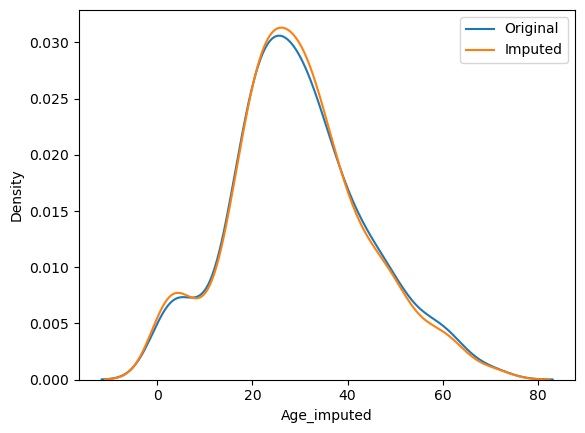

In [13]:
sns.distplot(X_train['Age'],label='Original', hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed', hist=False)
plt.legend()
plt.show()